In [30]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [31]:
df= pd.read_pickle('../datos/casual/13_casual-no-norm.pickle')
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,invierno,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331
1,invierno,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131
2,invierno,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,120
3,invierno,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,108
4,invierno,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,82


In [32]:
df.dtypes

season        category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [33]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['casual'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,casual
0,invierno,60557
1,otoño,129782
2,primavera,203522
3,verano,226091


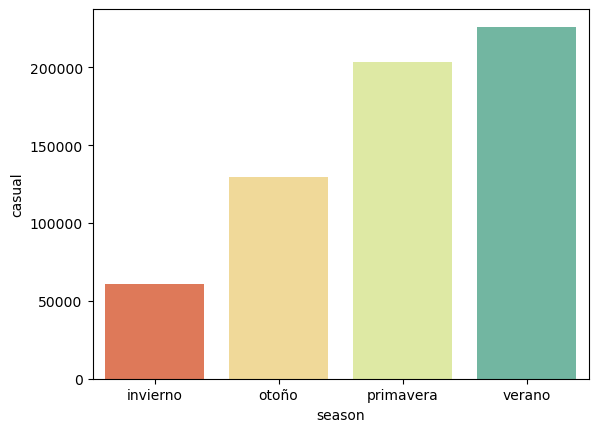

In [34]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [35]:
mapa_season = {'invierno':0, 'otoño':1, 'primavera':2, 'verano':3} 

In [36]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [37]:
holiday = df.groupby('holiday')['casual'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,casual
0,festivo,28062
1,no festivo,591890


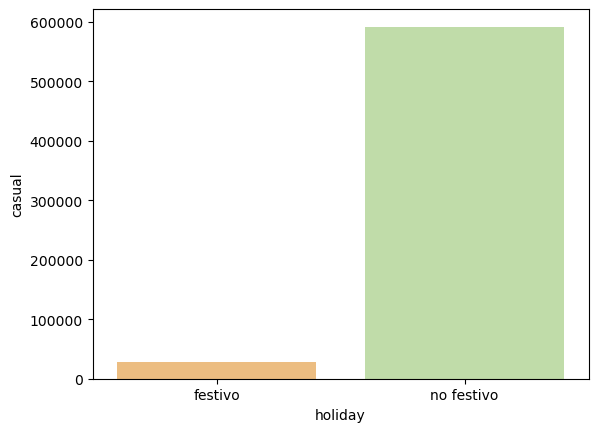

In [38]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

# Aumentamos el peso de no festivo con respecto a los registrados, segun vemos el peso en esta gráfica

In [39]:
mapa_holiday = {'festivo':0, 'no festivo':2} 

In [40]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [41]:
df.sample(2)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
228,3,2,5,laborable,1,29.656653,33.33355,57.5417,9.625689,668
443,0,2,3,laborable,1,22.994153,26.92665,80.7917,8.125157,1051


---

## WEEKDAY

In [42]:
semana = df.groupby('weekday')['casual'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,casual
0,1,141191
1,2,100781
2,3,65429
3,4,60750
4,5,59665
5,6,70954
6,7,121182


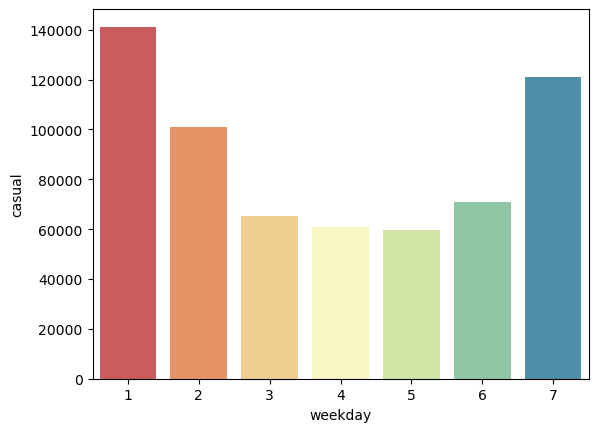

In [43]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

# Cambiamos el peso de los dias de la semana con respecto a registrados

In [44]:
mapa_weekday = { 1:3,
                2:1, 
                3:0,
                4:0, 
                5:0,
                6:0,
                7:2}

In [45]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [46]:
clima = df.groupby('weathersit')['casual'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,casual
0,1,446346
1,2,169711
2,3,3895


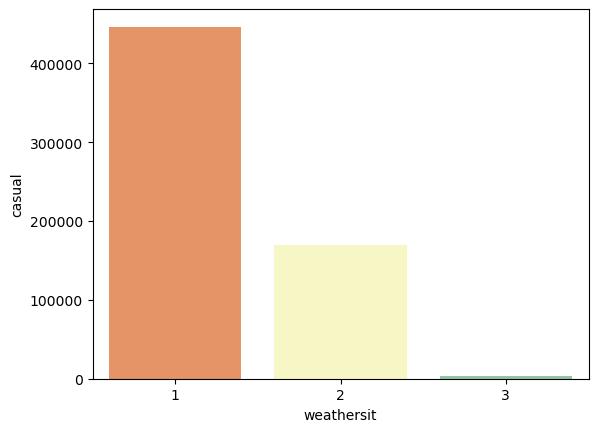

In [47]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'casual',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [48]:
mapa_weather = {3:0, 2:1, 1:2}

In [49]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

In [50]:
df.sample(2)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
600,3,2,0,finde,1,28.802500,32.3550,61.5000,4.833769,1325
465,2,2,0,laborable,2,14.296536,16.8637,46.9565,19.783358,482


In [51]:
df.drop('workingday', axis = 1, inplace= True)

# Borramos working day que se puede codificar

In [52]:
df.head()

,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual
0,0,0,3,1,14.110847,18.18125,80.5833,10.749882,331
1,0,2,1,1,14.902598,17.68695,69.6087,16.652113,131
2,0,2,0,2,8.050924,9.47025,43.7273,16.636703,120
3,0,2,0,2,8.200000,10.60610,59.0435,10.739832,108
4,0,2,0,2,9.305237,11.46350,43.6957,12.522300,82


In [53]:
df.to_pickle('../datos/casual/14-casual_encoding.pickle')

In [54]:
df.to_csv('../datos/casual/14-casual_encoding.csv')